Balaji Kartheek (200968080)

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
)
df = pd.read_csv(data_url, header=None)

Here in this dataset we need to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

In [ ]:
df.shape

(581012, 55)

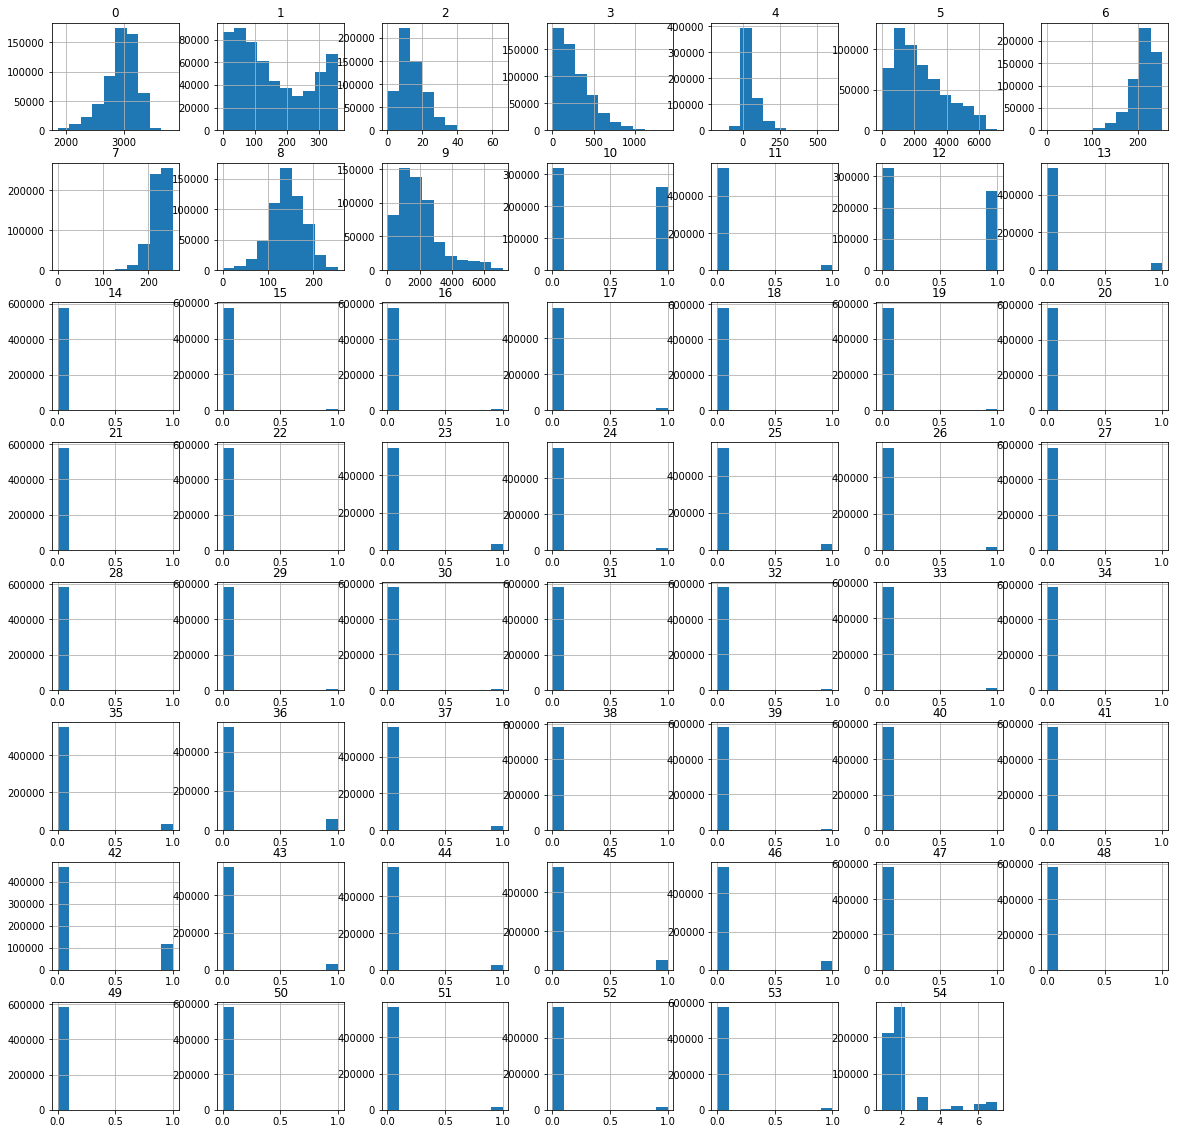

In [ ]:
df.hist(figsize = (20,20))
plt.show()

In [ ]:
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]

In [ ]:
soil_type_values

['soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 'soil_type_29',
 'soil_type_30',
 'soil_type_31',
 'soil_type_32',
 'soil_type_33',
 'soil_type_34',
 'soil_type_35',
 'soil_type_36',
 'soil_type_37',
 'soil_type_38',
 'soil_type_39',
 'soil_type_40']

In [ ]:
wilderness_area_values

['area_type_1', 'area_type_2', 'area_type_3', 'area_type_4']

### converting the each categorial variable 

In [ ]:
soil_type = df.loc[:, 14:53].apply(
    lambda x: soil_type_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)
wilderness_area = df.loc[:, 10:13].apply(
    lambda x: wilderness_area_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)


In [ ]:
wilderness_area   # this is one column in the dataset 

0         area_type_1
1         area_type_1
2         area_type_1
3         area_type_1
4         area_type_1
             ...     
581007    area_type_3
581008    area_type_3
581009    area_type_3
581010    area_type_3
581011    area_type_3
Length: 581012, dtype: object

In [ ]:
# list of headers in the dataset
CSV_HEADER = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area",
    "Soil_Type",
    "Cover_Type",
]

In [ ]:
data = pd.concat(
    [df.loc[:, 0:9], wilderness_area, soil_type, df.loc[:, 54]],   # (0-9) + (10-13) + (14-53) + (54)   concating the column indexies
    axis=1,
    ignore_index=True,
)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2596,51,3,258,0,510,221,232,148,6279,area_type_1,soil_type_29,5
1,2590,56,2,212,-6,390,220,235,151,6225,area_type_1,soil_type_29,5
2,2804,139,9,268,65,3180,234,238,135,6121,area_type_1,soil_type_12,2
3,2785,155,18,242,118,3090,238,238,122,6211,area_type_1,soil_type_30,2
4,2595,45,2,153,-1,391,220,234,150,6172,area_type_1,soil_type_29,5


In [ ]:
data.info()   # from this the column size is reduced from 55 to 13 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       581012 non-null  int64 
 1   1       581012 non-null  int64 
 2   2       581012 non-null  int64 
 3   3       581012 non-null  int64 
 4   4       581012 non-null  int64 
 5   5       581012 non-null  int64 
 6   6       581012 non-null  int64 
 7   7       581012 non-null  int64 
 8   8       581012 non-null  int64 
 9   9       581012 non-null  int64 
 10  10      581012 non-null  object
 11  11      581012 non-null  object
 12  12      581012 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 57.6+ MB


In [ ]:
data.columns = CSV_HEADER

In [ ]:
pd.DataFrame(data["Cover_Type"].value_counts())  # there are total 7 diff. variables in the "Cover_Type" column

,Cover_Type
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


In [ ]:
# Convert the target label indices into a range from 0 to 6 (there are 7 labels in total).
data["Cover_Type"] = data["Cover_Type"] - 1

In [ ]:
print(f"Dataset shape: {data.shape}")
data.head().T

Dataset shape: (581012, 13)


,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


Split the data into training (85%) and validation (15%) sets.


In [ ]:
train_splits = []
test_splits = []

for _, group_data in data.groupby("Cover_Type"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

In [ ]:
train_splits

[        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 40           2699     347      3                                 0   
 51           2739     323     25                                85   
 52           2696      72      2                                30   
 55           2722     315     24                                30   
 67           2919      13     13                                90   
 ...           ...     ...    ...                               ...   
 565339       2804      92     12                                 0   
 565432       2826      72     14                                67   
 565433       2820      69     14                                42   
 565527       2832      45     17                                85   
 565528       2827      43     18                                67   
 
         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
 40                                   0                             20

In [ ]:
 
train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

In [ ]:
train_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2775,88,12,268,18,2970,238,220,112,2401,area_type_1,soil_type_12,1
1,2808,2,13,711,74,390,201,215,150,1054,area_type_3,soil_type_11,1
2,2991,27,19,379,104,1996,208,195,117,2802,area_type_3,soil_type_32,1
3,2924,120,21,67,2,3503,250,217,85,2774,area_type_1,soil_type_29,1
4,2614,152,22,120,29,1797,241,234,110,2837,area_type_3,soil_type_4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494275,3119,122,9,216,26,3794,236,233,127,5026,area_type_1,soil_type_29,0
494276,3374,301,17,907,198,4562,170,230,200,2761,area_type_3,soil_type_38,6
494277,3230,75,8,67,9,5891,230,225,127,603,area_type_1,soil_type_22,0
494278,3087,22,9,150,19,2522,214,220,141,722,area_type_3,soil_type_23,0


In [ ]:
print(f"Train split size: {len(train_data.index)}")
print(f"Test split size: {len(test_data.index)}")
print(f"Whole dataset size: {len(df.index)}")


Train split size: 494280
Test split size: 86732
Whole dataset size: 581012


we store the training and test data in separate CSV files.

In [ ]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

In [ ]:
train_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2775,88,12,268,18,2970,238,220,112,2401,area_type_1,soil_type_12,1
1,2808,2,13,711,74,390,201,215,150,1054,area_type_3,soil_type_11,1
2,2991,27,19,379,104,1996,208,195,117,2802,area_type_3,soil_type_32,1
3,2924,120,21,67,2,3503,250,217,85,2774,area_type_1,soil_type_29,1
4,2614,152,22,120,29,1797,241,234,110,2837,area_type_3,soil_type_4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494275,3119,122,9,216,26,3794,236,233,127,5026,area_type_1,soil_type_29,0
494276,3374,301,17,907,198,4562,170,230,200,2761,area_type_3,soil_type_38,6
494277,3230,75,8,67,9,5891,230,225,127,603,area_type_1,soil_type_22,0
494278,3087,22,9,150,19,2522,214,220,141,722,area_type_3,soil_type_23,0


In [ ]:
TARGET_FEATURE_NAME = "Cover_Type"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6"]

NUMERIC_FEATURE_NAMES = [
    "Aspect",
    "Elevation",
    "Hillshade_3pm",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Slope",
    "Vertical_Distance_To_Hydrology",
]

In [ ]:
# defining a dictionary of keys soil type and wilderness_area
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "Soil_Type": list(data["Soil_Type"].unique()),
    "Wilderness_Area": list(data["Wilderness_Area"].unique()),
}

In [ ]:
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

In [ ]:
CATEGORICAL_FEATURE_NAMES

['Soil_Type', 'Wilderness_Area']

In [ ]:
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

In [ ]:
NUMERIC_FEATURE_NAMES

['Aspect',
 'Elevation',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Slope',
 'Vertical_Distance_To_Hydrology']

In [ ]:
CATEGORICAL_FEATURE_NAMES

['Soil_Type', 'Wilderness_Area']

In [ ]:
COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

In [ ]:
COLUMN_DEFAULTS

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], ['NA'], ['NA'], [0]]

In [ ]:
CSV_HEADER

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area',
 'Soil_Type',
 'Cover_Type']

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,area_type_1,soil_type_29,4
1,2590,56,2,212,-6,390,220,235,151,6225,area_type_1,soil_type_29,4
2,2804,139,9,268,65,3180,234,238,135,6121,area_type_1,soil_type_12,1
3,2785,155,18,242,118,3090,238,238,122,6211,area_type_1,soil_type_30,1
4,2595,45,2,153,-1,391,220,234,150,6172,area_type_1,soil_type_29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,area_type_3,soil_type_2,2
581008,2391,152,19,67,12,95,240,237,119,845,area_type_3,soil_type_2,2
581009,2386,159,17,60,7,90,236,241,130,854,area_type_3,soil_type_2,2
581010,2384,170,15,60,5,90,230,245,143,864,area_type_3,soil_type_2,2


## Experiment setup

Next, let's define an input function that reads and parses the file, then converts features
and labels into a[`tf.data.Dataset`](https://www.tensorflow.org/guide/datasets)
for training or evaluation.

# tf.data.experimental  
Experimental API for building input pipelines.

This module contains experimental Dataset sources and transformations that can
be used in conjunction with the tf.data.Dataset API. Note that the
tf.data.experimental API is not subject to the same backwards compatibility
guarantees as tf.data, but we will provide deprecation advice in advance of
removing existing functionality.

In [ ]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()


Here we configure the parameters and implement the procedure for running a training and evaluation experiment given a model.

# Model 1

- Create a multi-layer feed-forward network, where the categorical features are one-hot
encoded.
- learning_rate = 0.001
- dropout_rate = 0.1
- batch_size = 265
- num_epochs = 50
- hidden_units = [32, 32]


In [ ]:
learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [32, 32]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")


In [ ]:
train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

## Create model inputs

Now, define the inputs for the models as a dictionary, where the key is the feature name,
and the value is a `keras.layers.Input` tensor with the corresponding feature shape
and data type.

In [ ]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs


## Encode features

We create two representations of our input features: sparse and dense:
1. In the **sparse** representation, the categorical features are encoded with one-hot
encoding using the `CategoryEncoding` layer. This representation can be useful for the
model to *memorize* particular feature values to make certain predictions.
2. In the **dense** representation, the categorical features are encoded with
low-dimensional embeddings using the `Embedding` layer. This representation helps
the model to *generalize* well to unseen feature combinations.

In [ ]:

from tensorflow.keras.layers import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int" if use_embedding else "binary",
            )
            if use_embedding:
                # Convert the string input values into integer indices.
                encoded_feature = lookup(inputs[feature_name])
                embedding_dims = int(math.sqrt(len(vocabulary)))
                # Create an embedding layer with the specified dimensions.
                embedding = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                # Convert the index values to embedding representations.
                encoded_feature = embedding(encoded_feature)
            else:
                # Convert the string input values into a one hot encoding.
                encoded_feature = lookup(tf.expand_dims(inputs[feature_name], -1))
        else:
            # Use the numerical features as-is.
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)

        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    return all_features


## Experiment 1: a baseline model

In the first experiment, let's create a multi-layer feed-forward network,
where the categorical features are one-hot encoded.

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


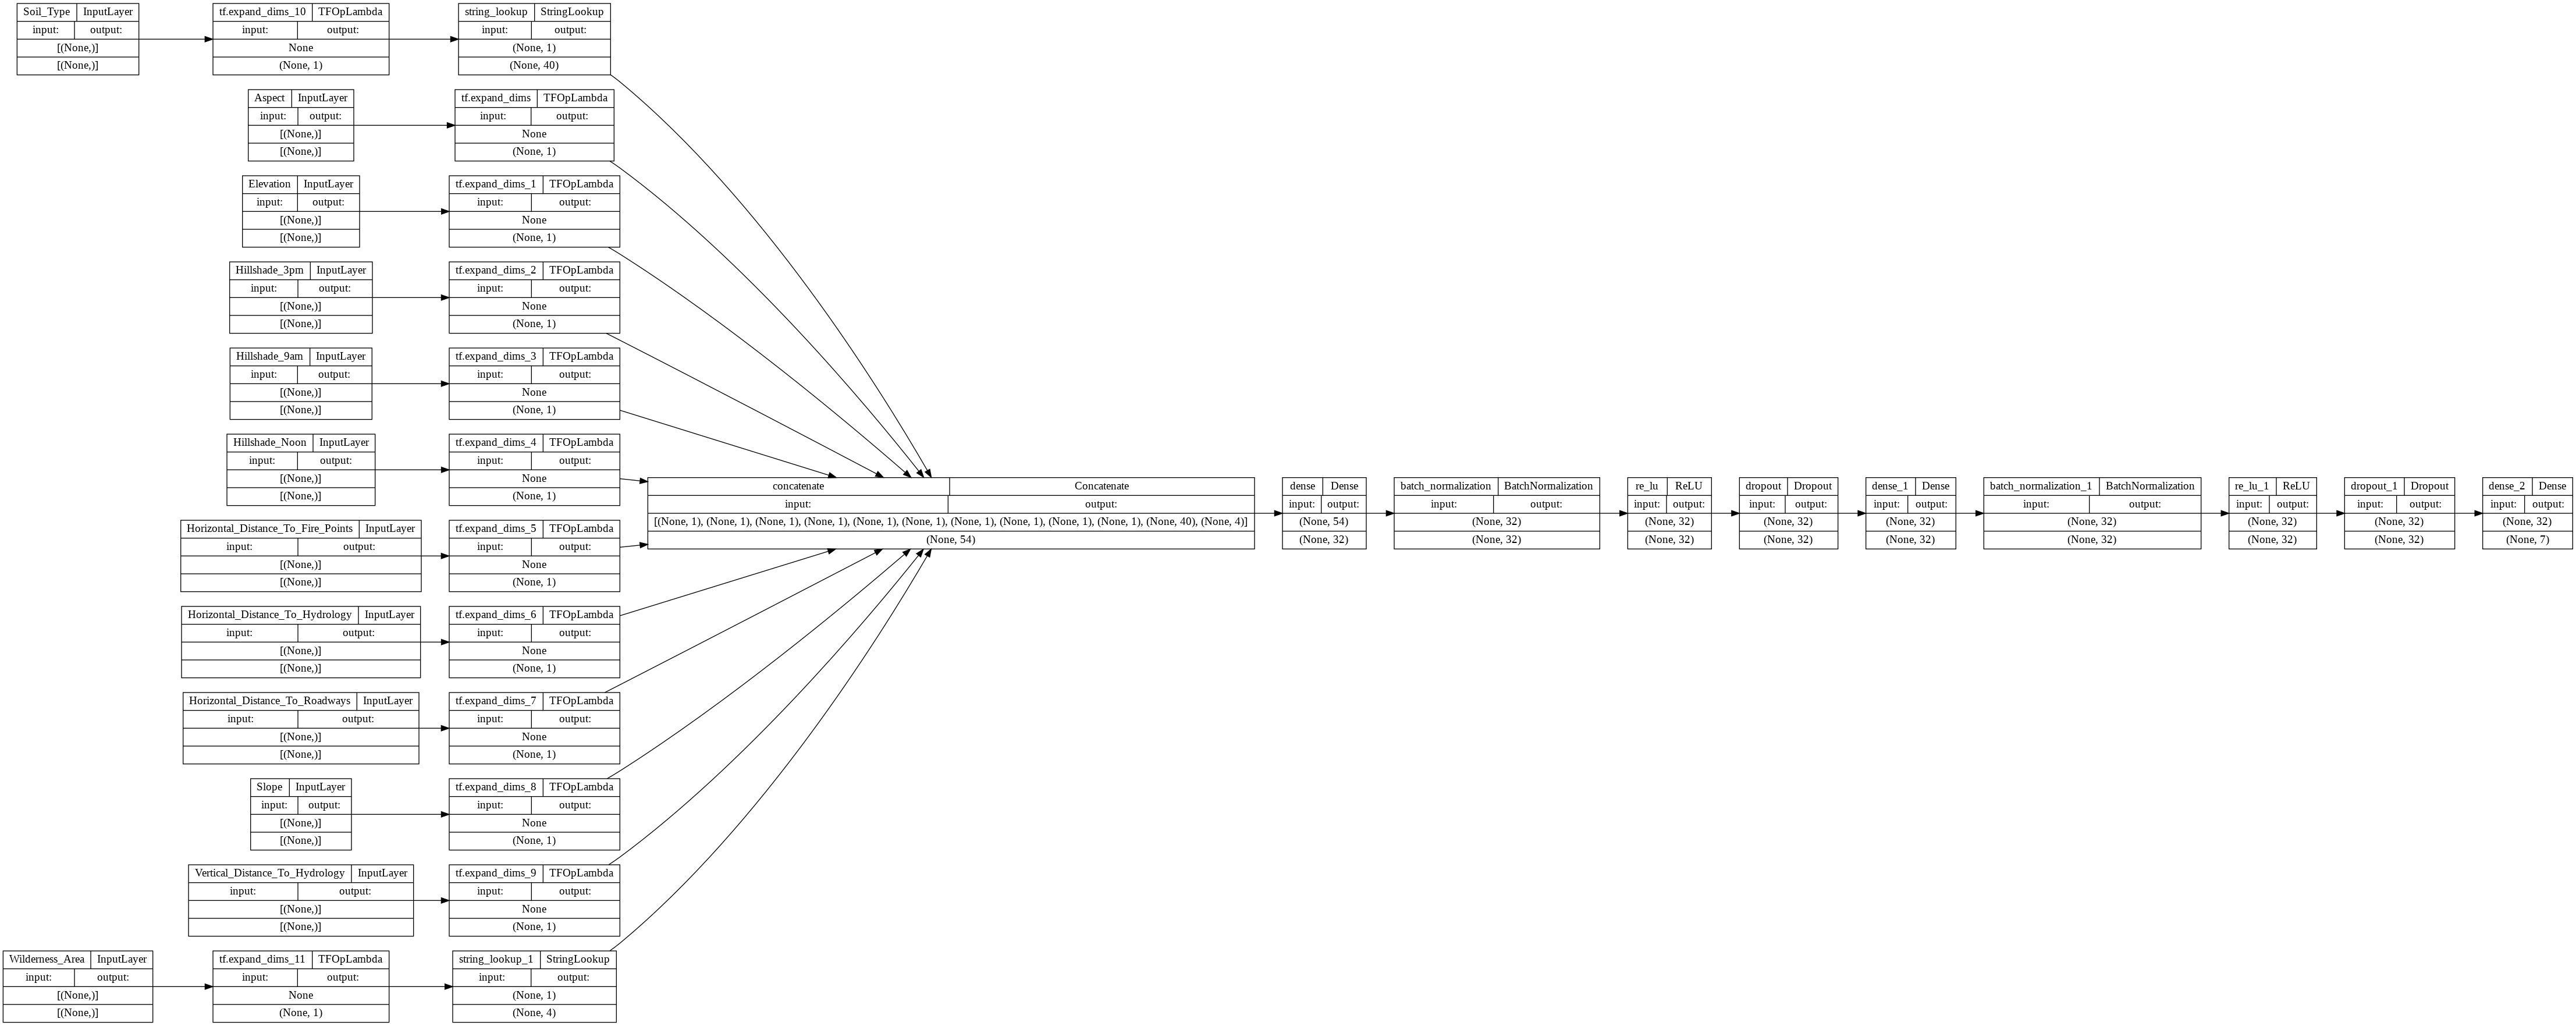

In [ ]:

def create_baseline_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)

    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model()
keras.utils.plot_model(baseline_model, show_shapes=True, rankdir="LR")

In [ ]:
run_experiment(baseline_model)

Start training the model...
Epoch 1/50
1866/1866 [==============================] - 18s 7ms/step - loss: 0.7675 - sparse_categorical_accuracy: 0.6809
Epoch 2/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.6674 - sparse_categorical_accuracy: 0.7128
Epoch 3/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.6414 - sparse_categorical_accuracy: 0.7234
Epoch 4/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.6188 - sparse_categorical_accuracy: 0.7340
Epoch 5/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.6069 - sparse_categorical_accuracy: 0.7401
Epoch 6/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.5997 - sparse_categorical_accuracy: 0.7434
Epoch 7/50
1866/1866 [==============================] - 10s 5ms/step - loss: 0.5918 - sparse_categorical_accuracy: 0.7468
Epoch 8/50
1866/1866 [==============================] - 9s 5ms/step - loss: 0.5873 - sparse_categorical_accuracy: 0.7482
Ep

The baseline linear model achieves ~77% test accuracy.

## Experiment 2: Wide & Deep model

In the second experiment, we create a Wide & Deep model. The wide part of the model
a linear model, while the deep part of the model is a multi-layer feed-forward network.

Use the sparse representation of the input features in the wide part of the model and the
dense representation of the input features for the deep part of the model.

Note that every input features contributes to both parts of the model with different
representations.

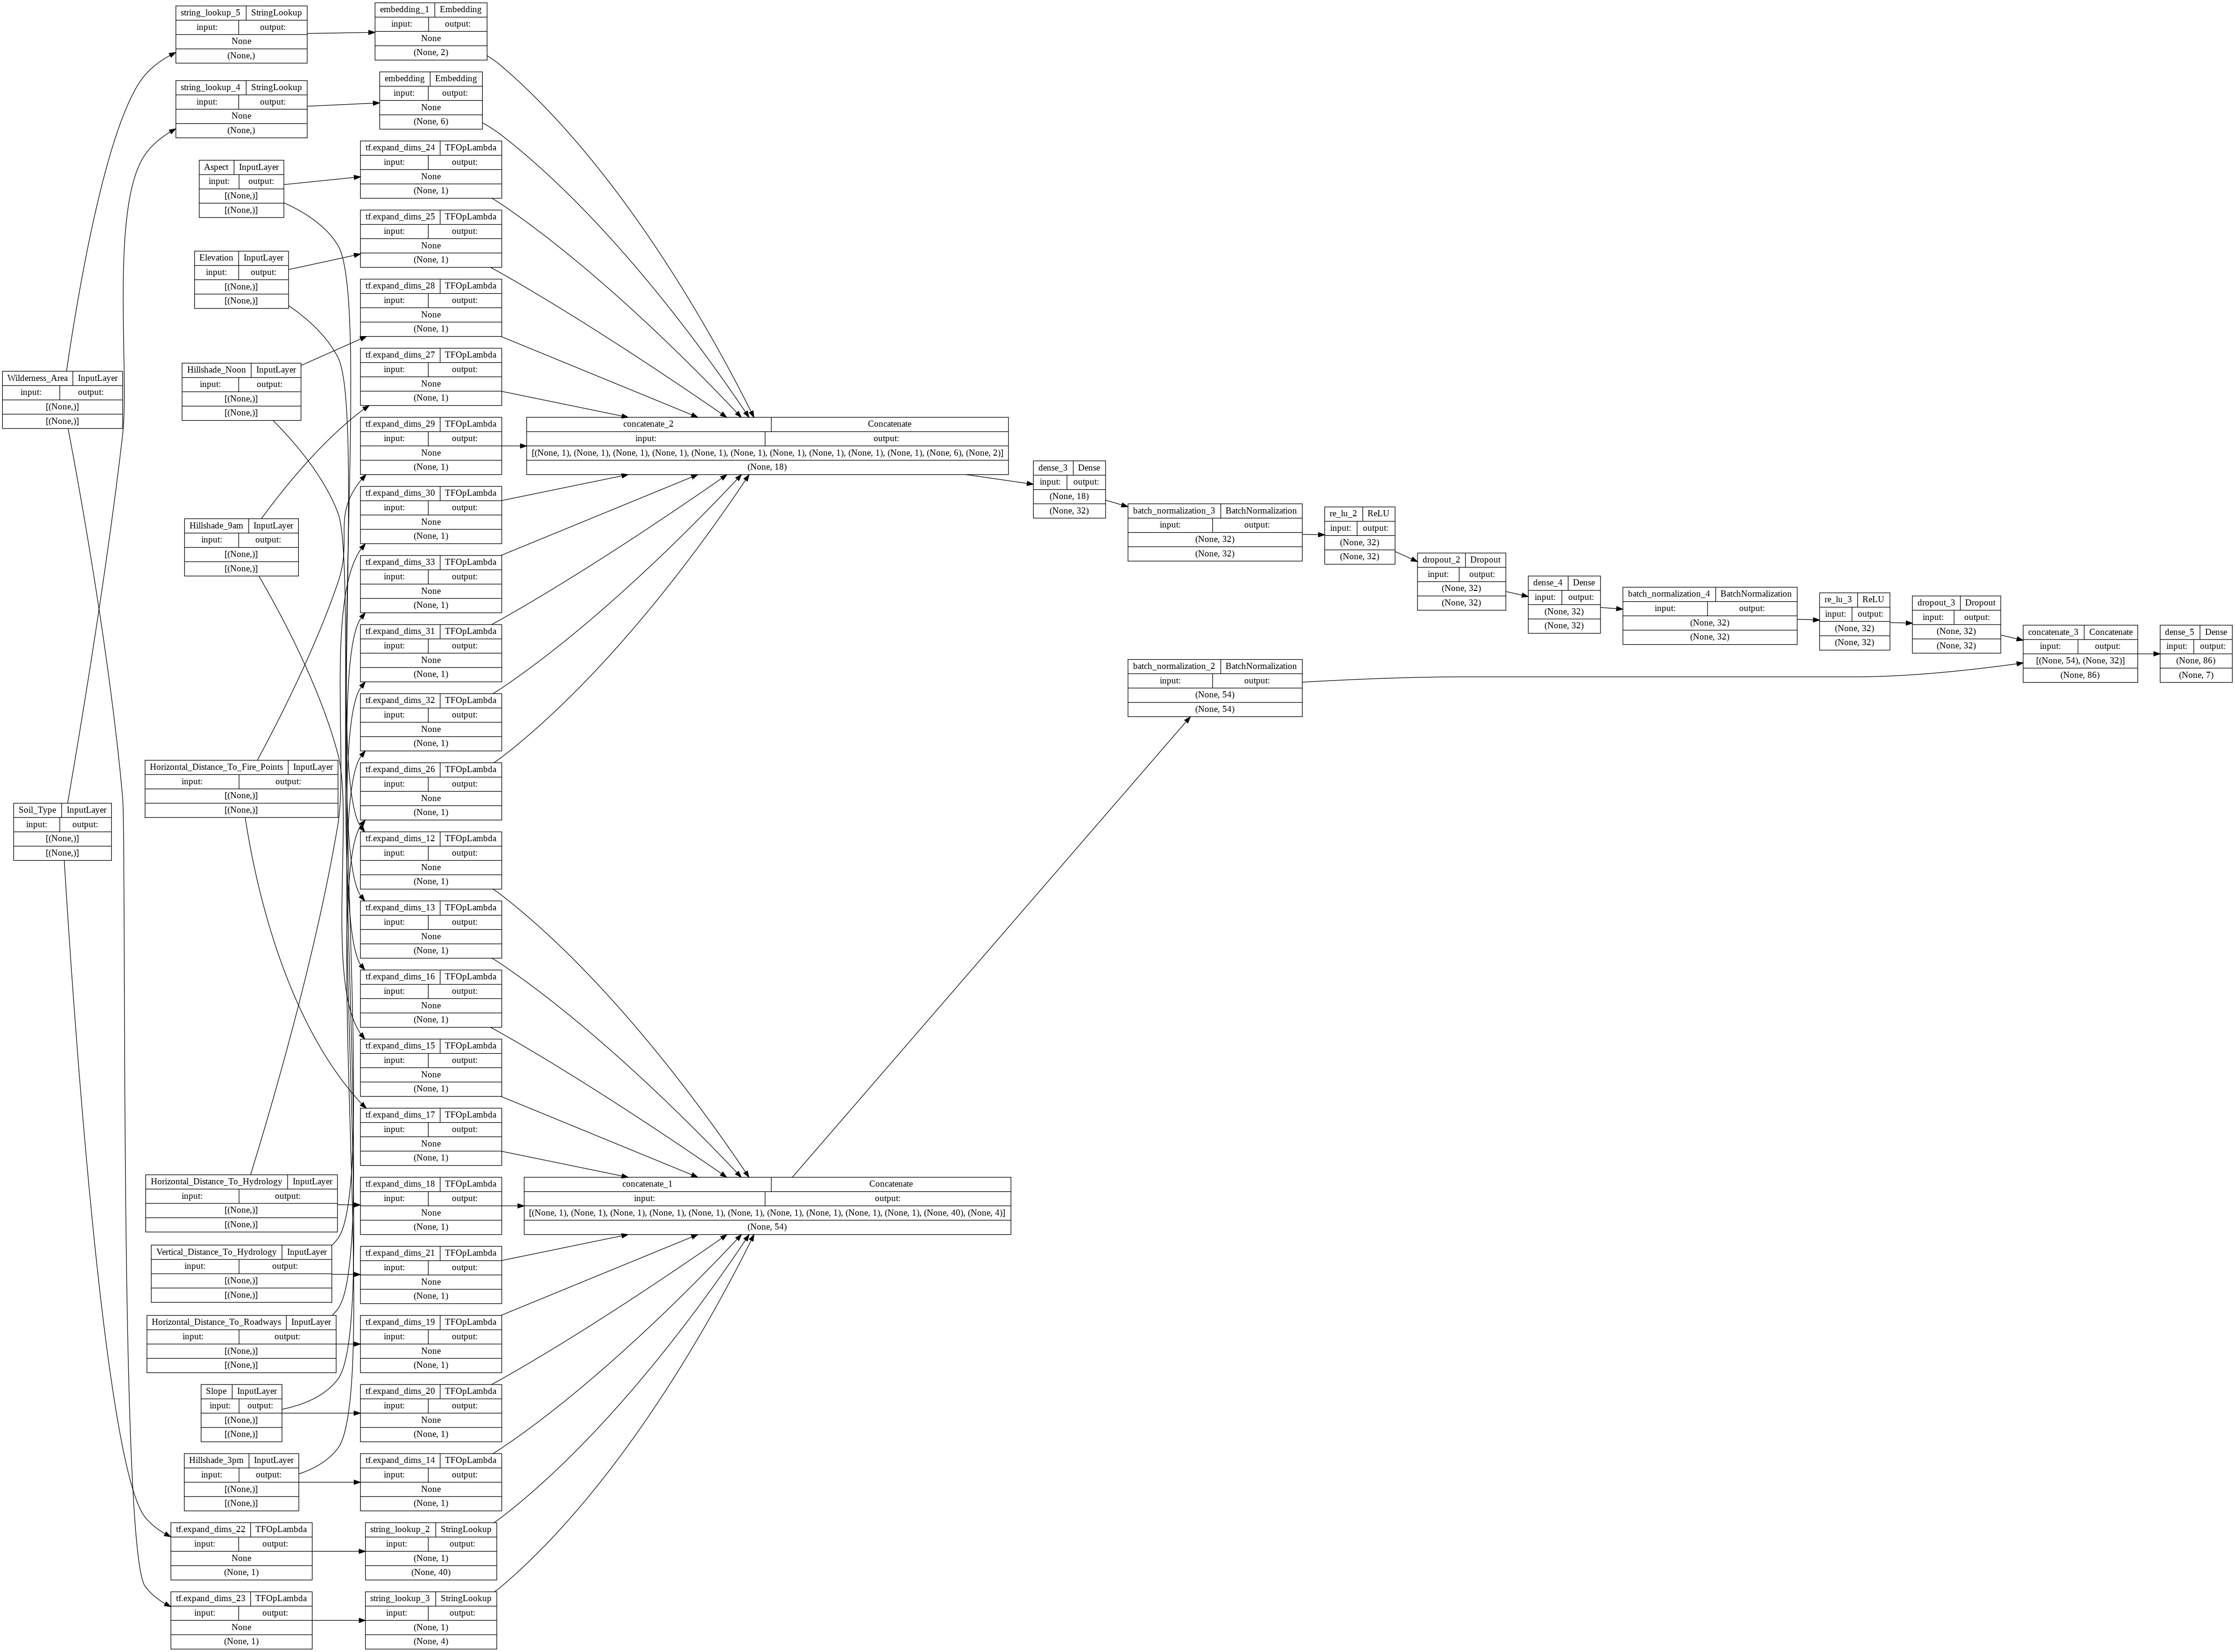

In [ ]:

def create_wide_and_deep_model():

    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)

    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


wide_and_deep_model = create_wide_and_deep_model()
keras.utils.plot_model(wide_and_deep_model, show_shapes=True, rankdir="LR")

In [ ]:
run_experiment(wide_and_deep_model)

Start training the model...
Epoch 1/50
1865/1865 [==============================] - 17s 9ms/step - loss: 0.7008 - sparse_categorical_accuracy: 0.7064
Epoch 2/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.6016 - sparse_categorical_accuracy: 0.7383
Epoch 3/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.5856 - sparse_categorical_accuracy: 0.7455
Epoch 4/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.5742 - sparse_categorical_accuracy: 0.7507
Epoch 5/50
1865/1865 [==============================] - 14s 7ms/step - loss: 0.5649 - sparse_categorical_accuracy: 0.7554
Epoch 6/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.5570 - sparse_categorical_accuracy: 0.7598
Epoch 7/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.5506 - sparse_categorical_accuracy: 0.7634
Epoch 8/50
1865/1865 [==============================] - 12s 6ms/step - loss: 0.5452 - sparse_categorical_accuracy: 0.7

The wide and deep model achieves ~81% test accuracy.

## Experiment 3: Deep & Cross model

In the third experiment, we create a Deep & Cross model. The deep part of this model
is the same as the deep part created in the previous experiment. The key idea of
the cross part is to apply explicit feature crossing in an efficient way,
where the degree of cross features grows with layer depth.

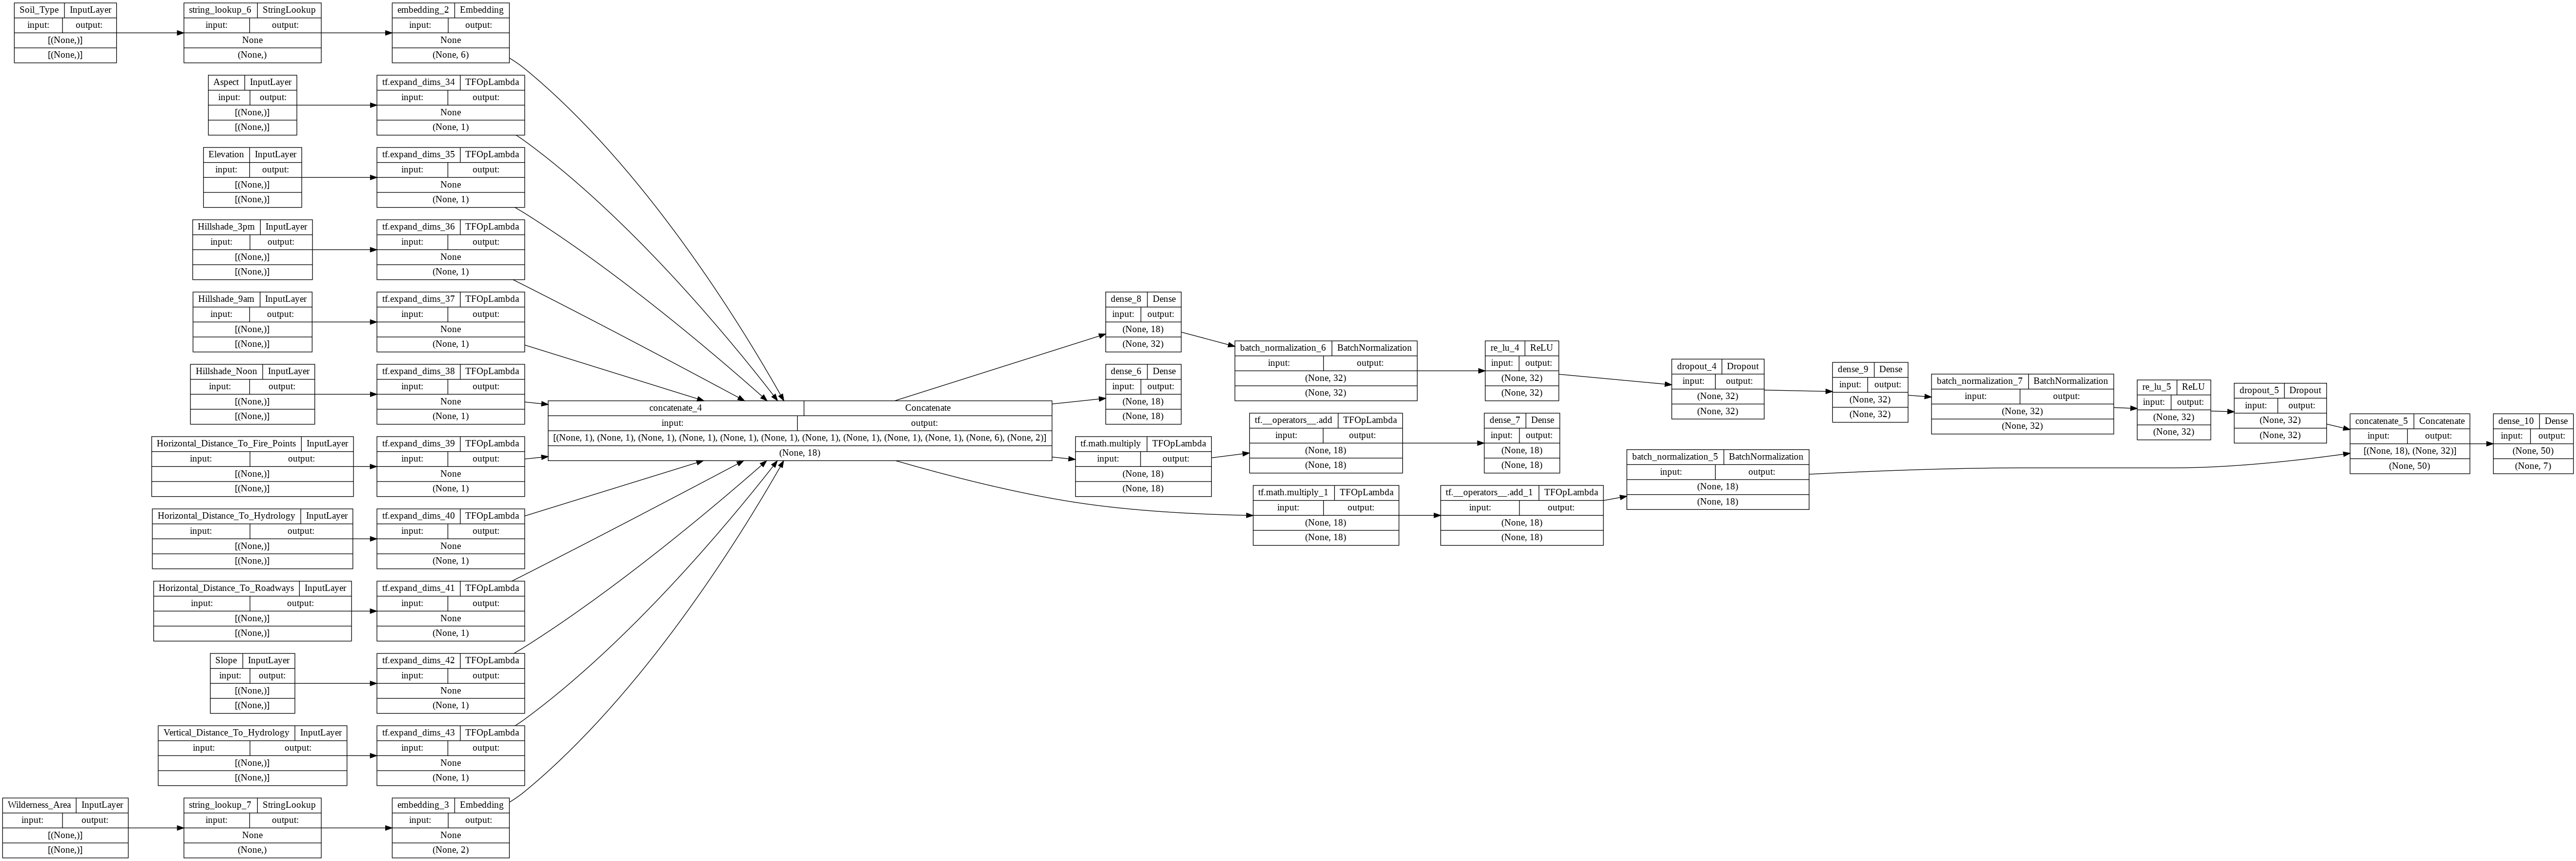

In [ ]:

def create_deep_and_cross_model():

    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)

    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)

    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


deep_and_cross_model = create_deep_and_cross_model()
keras.utils.plot_model(deep_and_cross_model, show_shapes=True, rankdir="LR")

In [ ]:
run_experiment(deep_and_cross_model)

Start training the model...
Epoch 1/50
1866/1866 [==============================] - 17s 8ms/step - loss: 0.6887 - sparse_categorical_accuracy: 0.7108
Epoch 2/50
1866/1866 [==============================] - 11s 6ms/step - loss: 0.5949 - sparse_categorical_accuracy: 0.7426
Epoch 3/50
1866/1866 [==============================] - 12s 6ms/step - loss: 0.5748 - sparse_categorical_accuracy: 0.7508
Epoch 4/50
1866/1866 [==============================] - 12s 6ms/step - loss: 0.5625 - sparse_categorical_accuracy: 0.7562
Epoch 5/50
1866/1866 [==============================] - 12s 6ms/step - loss: 0.5536 - sparse_categorical_accuracy: 0.7600
Epoch 6/50
1866/1866 [==============================] - 11s 6ms/step - loss: 0.5479 - sparse_categorical_accuracy: 0.7628
Epoch 7/50
1866/1866 [==============================] - 11s 6ms/step - loss: 0.5421 - sparse_categorical_accuracy: 0.7658
Epoch 8/50
1866/1866 [==============================] - 11s 6ms/step - loss: 0.5380 - sparse_categorical_accuracy: 0.7

The deep and cross model achieves ~80% test accuracy.

## Conclusion

- from the above three models third and second models are performing similarlly and better than compare to the first model
- Model 3 (a Deep & Cross model) is having less error and higher accuracy, performance than the Model 2 (Wide & Deep model) and Model 1(multi-layer feed-forward network)